<a href="https://colab.research.google.com/github/Chenyan-Lu/GIS322/blob/main/notebook/Module_4_(1)_Reading_and_Writing_Spatial_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading and Writing Spatial Data

<br></br>
In this notebook, you will learn how to read and write spatial data (like ESRI's shapefiles) in python using `geopandas` library.

## Reading Spatial Data




<br></br>
geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more using the command:


<br></br>
`geopandas.read_file()`



In [1]:
!pip install geopandas #This line is to install geopandas in Google Colab
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
states = gpd.read_file("../data/US_lower_48/US_lower_48.shp") #Get this file from data.zip


<br></br>
The file read in is called a `GeoDataFrame`

In [4]:
states.__class__

geopandas.geodataframe.GeoDataFrame


<br></br>
Note that last column `geometry` in the GeoDataFrame `states` contains shapes. Other columns contain the attributes of each ploygon, in our example of each state.

In [5]:
states.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266474513,489028543,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138949136250,31361101223,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143780567633,6214824948,+40.1028754,-089.1526108,"POLYGON ((-91.1853 40.6378, -91.1751 40.64303,..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206228939448,18945217189,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.6305, -96.78434 46.6305..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151100280,6979966958,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."


## Plotting Spatial Data


<br></br>

After your spatial data are readed in, you can use this command to do a simple plot:

<br></br>
`GeoDataFrame.plot()`

<br></br>
where in the below example, there are several added argument in the `GeoDataFrame.plot()`


* ```figsize=(10,5)``` is to set the size of the figure
* ```color='white'``` is to set the fill color of the polygon
* ```edgecolor='black'``` is to set the edge color of the polygon

<Axes: >

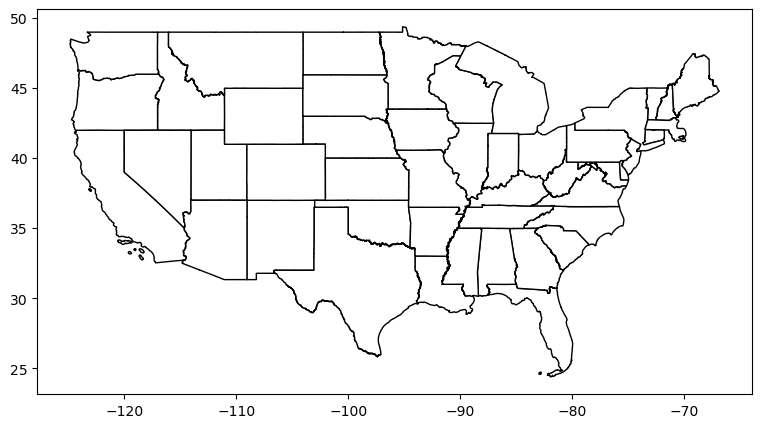

In [6]:
states.plot(figsize=(10,5),color='white', edgecolor='black')


<br></br>
A `geopandas`'s `GeoDataFrame` is a subclass of `pandas`'s `DataFrame`, which means that all the methods in `pandas.DataFrame` apply to `geopandas.GeoDataFrame`.

<br></br>
For example, let's subset our `states` and get Arizona!



In [7]:
AZ = states[states.NAME == "Arizona"]
AZ

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
47,4,8,04,01779777,04,AZ,Arizona,00,G4000,A,294198551143,1027337603,+34.2039355,-111.6063565,"POLYGON ((-114.51645 33.02762, -114.51664 33.0..."


<Axes: >

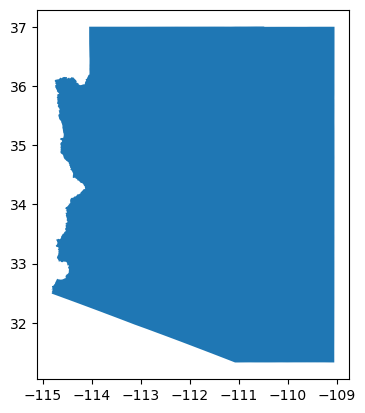

In [8]:
AZ.plot()


<br></br>
You can change the fill color of the polygon by using `.plot(,color="orange")`.

Text(0.5, 0.98, 'Arizona')

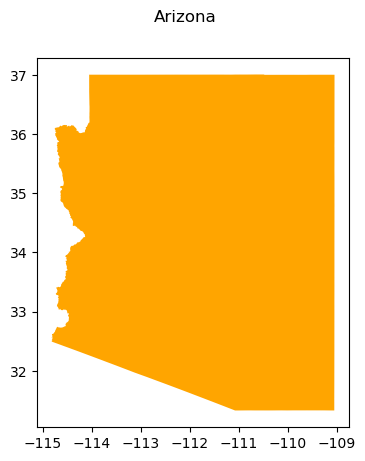

In [9]:
fig, ax = plt.subplots(1, 1)
AZ.plot(ax=ax, color="orange")
fig.suptitle("Arizona")


<br></br>
Now, let's add our capital ono the map. We will be creating a `shapely.geometry.Point` class, and use Phoenix's longitude and latitude to initalize the `Point` class, like this

In [10]:
from shapely.geometry import Point
PHX_coor = Point(-112.0740, 33.4484)
phx = gpd.GeoSeries(PHX_coor)

Text(0.5, 0.98, 'Arizona')

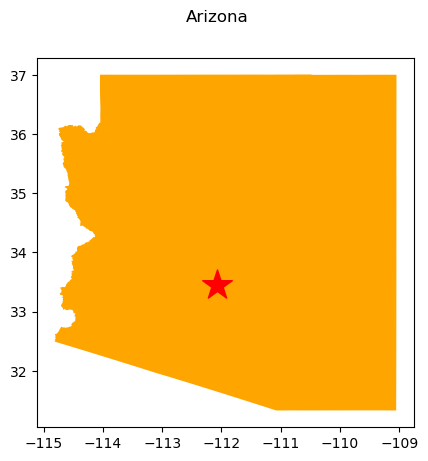

In [11]:
fig, ax = plt.subplots(1, 1)
AZ.plot(ax=ax, color="orange")
phx.plot(ax=ax,marker="*",markersize=500,color="red")
fig.suptitle("Arizona")

## Writing Spatial Data

<br></br>
Writing the GeoDataFrame to file is straightfoward by following this command:

`GeoDataFrame.to_file`

In [12]:
AZ.to_file("az.shp")

Let's check if our writing is right by re-read the file, and plot it.

<Axes: >

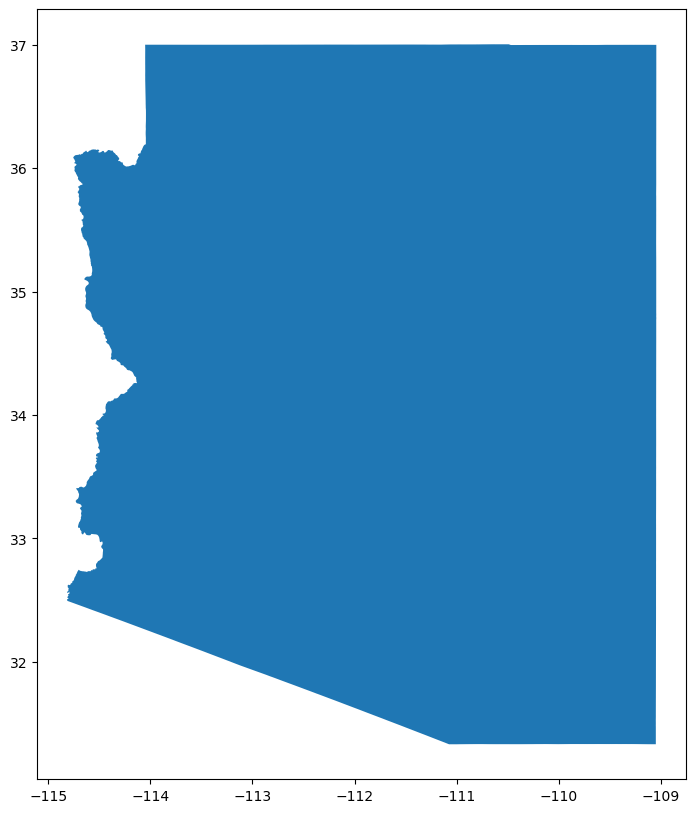

In [13]:
az_check = gpd.read_file("az.shp")
az_check.plot(figsize=(10,10))